In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [4]:
df.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [5]:
X = df.drop('diagnosis', axis=1)
y = pd.DataFrame(df['diagnosis'])

sample_row = X.loc[0].to_dict()
num_cols = list(X.select_dtypes('number').columns)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=0)

In [6]:
num_pipeline = Pipeline(steps=[
    ('scale', StandardScaler())
])

preprocessing = ColumnTransformer(transformers=[
    ('num_pipeline', num_pipeline, num_cols)
])

model = XGBClassifier()

pipeline = Pipeline(steps=[
    ('transformer', preprocessing),
    ('model', model)
])

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_valid_encoded = le.transform(y_valid)

pipeline.fit(X_train, y_train_encoded)
preds = pipeline.predict(X_valid)

print(f'accuracy: {accuracy_score(y_valid_encoded, preds)}')

/home/uz/anaconda3/envs/gcash/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/uz/anaconda3/envs/gcash/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


accuracy: 0.9649122807017544


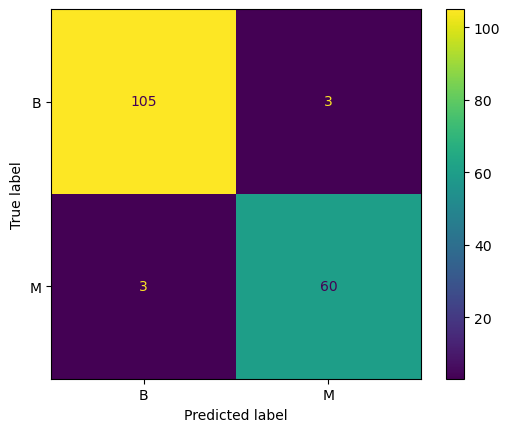

In [7]:
cm = confusion_matrix(y_valid, le.inverse_transform(preds))
ConfusionMatrixDisplay(cm, display_labels=le.classes_).plot()

In [8]:
import pickle

with open('pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline, file)
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(le, file)


In [13]:
from pydantic import BaseModel, Field, ValidationError

class Patient(BaseModel):
    id: int = Field(..., description="Unique identifier for the diagnostic record")
    radius_mean: float = Field(..., description="Mean radius of the tumor")
    texture_mean: float = Field(..., description="Mean texture of the tumor")
    perimeter_mean: float = Field(..., description="Mean perimeter of the tumor")
    area_mean: float = Field(..., description="Mean area of the tumor")
    smoothness_mean: float = Field(..., description="Mean smoothness of the tumor")
    compactness_mean: float = Field(..., description="Mean compactness of the tumor")
    concavity_mean: float = Field(..., description="Mean concavity of the tumor")
    concave_points_mean: float = Field(..., alias="concave points_mean")
    symmetry_mean: float = Field(..., description="Mean symmetry of the tumor")
    fractal_dimension_mean: float = Field(..., description="Mean fractal dimension of the tumor")
    
    radius_se: float = Field(..., description="Standard error of radius")
    texture_se: float = Field(..., description="Standard error of texture")
    perimeter_se: float = Field(..., description="Standard error of perimeter")
    area_se: float = Field(..., description="Standard error of area")
    smoothness_se: float = Field(..., description="Standard error of smoothness")
    compactness_se: float = Field(..., description="Standard error of compactness")
    concavity_se: float = Field(..., description="Standard error of concavity")
    concave_points_se: float = Field(..., alias="concave points_se")
    symmetry_se: float = Field(..., description="Standard error of symmetry")
    fractal_dimension_se: float = Field(..., description="Standard error of fractal dimension")

    radius_worst: float = Field(..., description="Worst radius measurement")
    texture_worst: float = Field(..., description="Worst texture measurement")
    perimeter_worst: float = Field(..., description="Worst perimeter measurement")
    area_worst: float = Field(..., description="Worst area measurement")
    smoothness_worst: float = Field(..., description="Worst smoothness measurement")
    compactness_worst: float = Field(..., description="Worst compactness measurement")
    concavity_worst: float = Field(..., description="Worst concavity measurement")
    concave_points_worst: float = Field(..., alias="concave points_worst")
    symmetry_worst: float = Field(..., description="Worst symmetry measurement")
    fractal_dimension_worst: float = Field(..., description="Worst fractal dimension measurement")

with open('label_encoder.pkl', 'rb') as file:
    loaded_le = pickle.load(file)

with open('pipeline.pkl', 'rb') as file:
    loaded_pipeline = pickle.load(file)

print(sample_row)
patient = Patient(**sample_row)
inputs = pd.DataFrame([patient.model_dump(by_alias=True)])
pred = loaded_pipeline.predict(inputs)
loaded_le.inverse_transform(pred)[0]



{'id': 842302.0, 'radius_mean': 17.99, 'texture_mean': 10.38, 'perimeter_mean': 122.8, 'area_mean': 1001.0, 'smoothness_mean': 0.1184, 'compactness_mean': 0.2776, 'concavity_mean': 0.3001, 'concave points_mean': 0.1471, 'symmetry_mean': 0.2419, 'fractal_dimension_mean': 0.07871, 'radius_se': 1.095, 'texture_se': 0.9053, 'perimeter_se': 8.589, 'area_se': 153.4, 'smoothness_se': 0.006399, 'compactness_se': 0.04904, 'concavity_se': 0.05373, 'concave points_se': 0.01587, 'symmetry_se': 0.03003, 'fractal_dimension_se': 0.006193, 'radius_worst': 25.38, 'texture_worst': 17.33, 'perimeter_worst': 184.6, 'area_worst': 2019.0, 'smoothness_worst': 0.1622, 'compactness_worst': 0.6656, 'concavity_worst': 0.7119, 'concave points_worst': 0.2654, 'symmetry_worst': 0.4601, 'fractal_dimension_worst': 0.1189}


'M'

In [10]:
from flask import Flask, jsonify, request

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    try:
        patient = Patient(**request.json)
        inputs = pd.DataFrame([patient.model_dump(by_alias=True)])
        pred = loaded_pipeline.predict(inputs)
        actual_pred = loaded_le.inverse_transform(pred)[0]
        response = {
            'prediction': actual_pred
        }
        return jsonify(response)
    except ValidationError as e:
        return jsonify(e.errors()), 400

if __name__=='__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


Address already in use
Port 5000 is in use by another program. Either identify and stop that program, or start the server with a different port.


SystemExit: 1

/home/uz/anaconda3/envs/gcash/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
